In [4]:
###### Import some libraries
import tensorflow as tf
import numpy as np

#Imports for visualizations
import PIL.Image
from io import BytesIO
from IPython.display import Image,display

Define a function to actually display the image

In [5]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

Use an interactive session to play

In [6]:
sess = tf.InteractiveSession()

In [7]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
print(Y)
print (X)
Z = X+1j*Y
print(Z)

[[-1.3   -1.3   -1.3   ... -1.3   -1.3   -1.3  ]
 [-1.295 -1.295 -1.295 ... -1.295 -1.295 -1.295]
 [-1.29  -1.29  -1.29  ... -1.29  -1.29  -1.29 ]
 ...
 [ 1.285  1.285  1.285 ...  1.285  1.285  1.285]
 [ 1.29   1.29   1.29  ...  1.29   1.29   1.29 ]
 [ 1.295  1.295  1.295 ...  1.295  1.295  1.295]]
[[-2.    -1.995 -1.99  ...  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...  0.985  0.99   0.995]
 ...
 [-2.    -1.995 -1.99  ...  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...  0.985  0.99   0.995]]
[[-2.   -1.3j   -1.995-1.3j   -1.99 -1.3j   ...  0.985-1.3j
   0.99 -1.3j    0.995-1.3j  ]
 [-2.   -1.295j -1.995-1.295j -1.99 -1.295j ...  0.985-1.295j
   0.99 -1.295j  0.995-1.295j]
 [-2.   -1.29j  -1.995-1.29j  -1.99 -1.29j  ...  0.985-1.29j
   0.99 -1.29j   0.995-1.29j ]
 ...
 [-2.   +1.285j -1.995+1.285j -1.99 +1.285j ...  0.985+1.285j
   0.99 +1.285j  0.995+1.285j]
 [-2.   +1.29j  -1.995+1.2

Now we define and initialize TensorFlow tensors.

In [8]:
xs = tf.constant(Z.astype(np.complex64))
print(xs)
zs = tf.Variable(xs)
print(zs)
bs = tf.zeros_like(xs,tf.float32)
print(bs)
ns = tf.Variable(bs)
print(ns)


Tensor("Const:0", shape=(520, 600), dtype=complex64)
<tf.Variable 'Variable:0' shape=(520, 600) dtype=complex64_ref>
Tensor("zeros_like:0", shape=(520, 600), dtype=float32)
<tf.Variable 'Variable_1:0' shape=(520, 600) dtype=float32_ref>


Initialize variables in TensorFlow before using them

In [9]:
tf.global_variables_initializer().run()

In [16]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [17]:
for i in range(200): step.run()

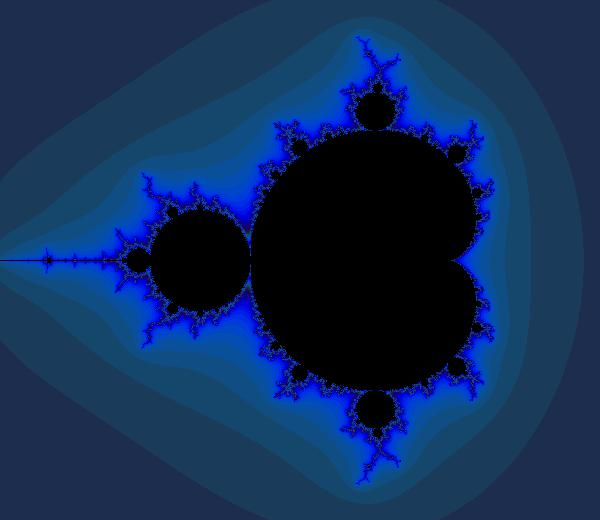

In [19]:
DisplayFractal(ns.eval())

That is cool, can you do different shapes?

In [39]:
# Compute the new values of z: z^3 + x
zs_new = zs**4 + xs

In [40]:
# Have we diverged with this new value?
not_diverged = tf.abs(zs_new) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_new),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [41]:
for i in range(200): step.run()

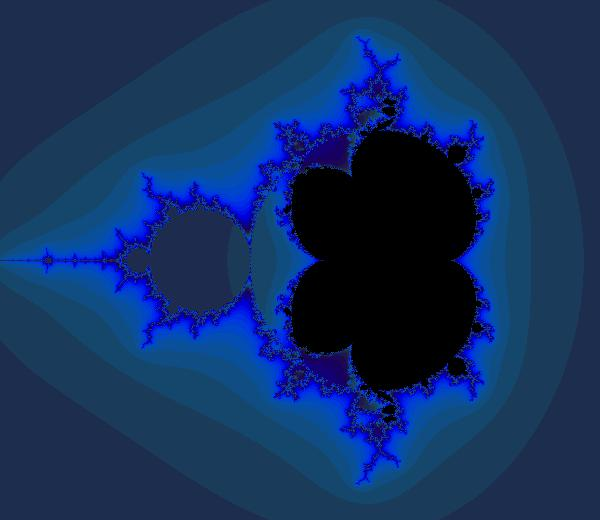

In [42]:
DisplayFractal(ns.eval())